# Now we will try to consider the different tracks and different positions of cyclist in different races

First of all we need to merge the 2 datasets and to remove the columns that we've seen are not good enough or useless

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import os
import sys
sys.path.append('../dataset/')
sys.path.append('../utility/')

from utility.data_understanding import *

In [73]:
cyclist_df = pd.read_csv(os.path.join('dataset','cyclists.csv'))
races_df = pd.read_csv(os.path.join('dataset','races.csv'))

In [74]:
merged_df = pd.merge(races_df, cyclist_df, left_on='cyclist', right_on='_url', how='inner')
merged_df.head()

,_url_x,name_x,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,...,is_cobbled,is_gravel,cyclist_team,delta,_url_y,name_y,birth_year,weight,height,nationality
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,vini-ricordi-pinarello-sidermec-1986,0.0,sean-kelly,Sean Kelly,1956.0,77.0,180.0,Ireland
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,norway-1987,0.0,gerrie-knetemann,Gerrie Knetemann,1951.0,NaN,NaN,Netherlands
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,NaN,0.0,rene-bittinger,René Bittinger,1954.0,69.0,174.0,France
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,navigare-blue-storm-1993,0.0,joseph-bruyere,Joseph Bruyère,1948.0,NaN,NaN,Belgium
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,...,False,False,spain-1991,0.0,sven-ake-nilsson,Sven-Åke Nilsson,1951.0,63.0,172.0,Sweden


In [75]:
# Display all column names in the merged_df DataFrame
merged_df.columns

Index(['_url_x', 'name_x', 'points', 'uci_points', 'length', 'climb_total',
       'profile', 'startlist_quality', 'average_temperature', 'date',
       'position', 'cyclist', 'cyclist_age', 'is_tarmac', 'is_cobbled',
       'is_gravel', 'cyclist_team', 'delta', '_url_y', 'name_y', 'birth_year',
       'weight', 'height', 'nationality'],
      dtype='object')

In [76]:
# Drop some columns and rename others
columns_to_drop = ['name_y', 'cyclist', 'name_x', 'is_cobbled', 'is_gravel']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df = merged_df.rename(columns={'_url_y': '_url_cyclist', '_url_x': '_url_race'})
merged_df.head()

,_url_race,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist_age,is_tarmac,cyclist_team,delta,_url_cyclist,birth_year,weight,height,nationality
0,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,22.0,True,vini-ricordi-pinarello-sidermec-1986,0.0,sean-kelly,1956.0,77.0,180.0,Ireland
1,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,27.0,True,norway-1987,0.0,gerrie-knetemann,1951.0,NaN,NaN,Netherlands
2,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,24.0,True,NaN,0.0,rene-bittinger,1954.0,69.0,174.0,France
3,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,30.0,True,navigare-blue-storm-1993,0.0,joseph-bruyere,1948.0,NaN,NaN,Belgium
4,tour-de-france/1978/stage-6,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,27.0,True,spain-1991,0.0,sven-ake-nilsson,1951.0,63.0,172.0,Sweden


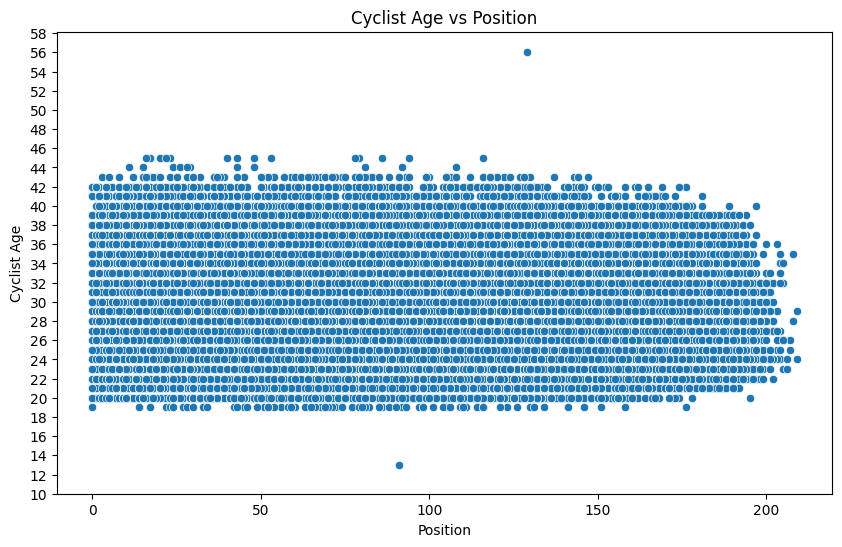

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='position', y='cyclist_age')
plt.title('Cyclist Age vs Position')
plt.xlabel('Position')
plt.ylabel('Cyclist Age')
plt.yticks(np.arange(10, 60, 2))
plt.show()

The number of races is: 589865


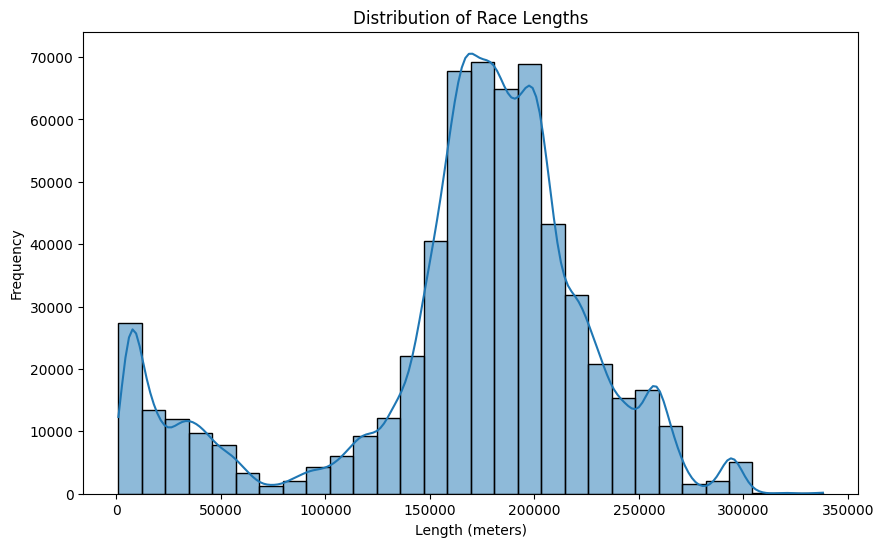

In [96]:
# Show the length of the races
print(f'The number of races is: {len(races_df)}')
plt.figure(figsize=(10, 6))
sns.histplot(races_df['length'], bins=30, kde=True)
plt.title('Distribution of Race Lengths')
plt.xlabel('Length (meters)')
plt.ylabel('Frequency')
plt.show()

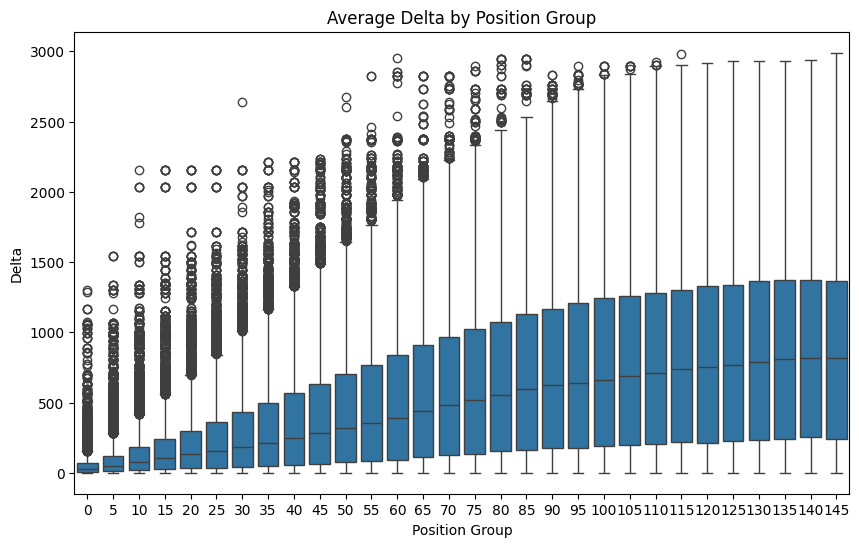

In [107]:
# Filter the data for the first 10 positions and non-zero delta values
filtered_df = merged_df[(merged_df['position'] < 150) & (merged_df['delta'] != 0) & (merged_df['delta'] < 3000) & (merged_df['delta'] > -100)]

# Filter the data for races that are within a given length range
length_range = (100000, 250000)  # Example length range in meters
filtered_df = filtered_df[(filtered_df['length'] >= length_range[0]) & (filtered_df['length'] <= length_range[1])]

# Create a new column 'position_group' that groups positions in intervals of 5
filtered_df['position_group'] = (filtered_df['position'] // 5) * 5

# Plot the box plot for the average delta by position group
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='position_group', y='delta')
plt.title('Average Delta by Position Group')
plt.xlabel('Position Group')
plt.ylabel('Delta')
plt.show()


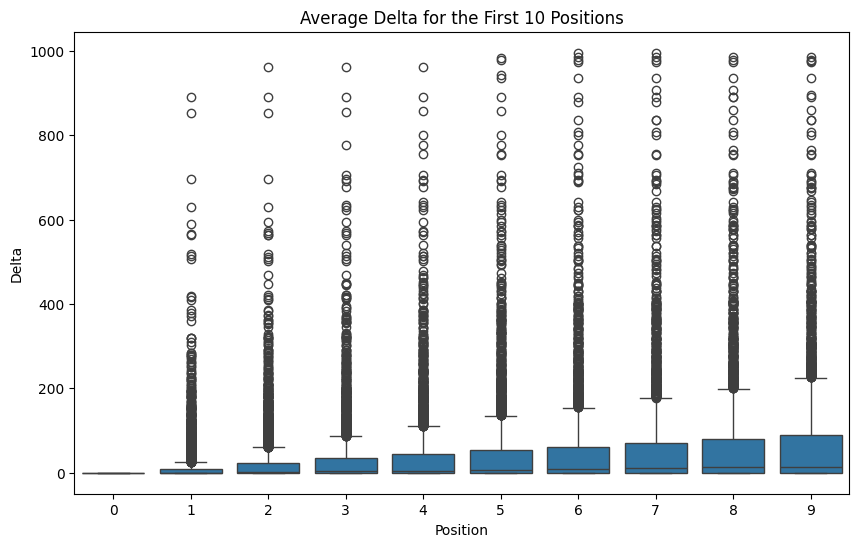

In [101]:
# Filter the data for the first 10 positions and non-zero delta values
filtered_df = merged_df[(merged_df['position'] < 10) & (merged_df['delta'] < 1000) & (merged_df['delta'] > -100)]

# Filter the data for races that are within a given length range
length_range = (150000, 250000)  # Example length range in meters
filtered_df = filtered_df[(filtered_df['length'] >= length_range[0]) & (filtered_df['length'] <= length_range[1])]

# Plot the box plot for the average delta
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='position', y='delta')
plt.title('Average Delta for the First 10 Positions')
plt.xlabel('Position')
plt.ylabel('Delta')
plt.yticks(np.arange(0, 1000, 50))
plt.show()

We need to remove negative values, too big values, and also, there is a more tricky problem... how many people can arrive at the same time (if we are measuring intervals of 1 second probably a bunch) for shure not 100, we need to understand what is a reeasonable group size in order to avoid considering akwardly big groups in future analysis

Another problem is: how small should be the delta like reasonably can someone arrive 3 hours later than the first person? probably yes in very long races, but probably not in shorter races, this means we should do different analysis based on teh different length